In [187]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#Code goes after this line by adding cells

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

>**Task 1.1: Data Retrieving**

In [189]:
starwar = pd.read_csv(r'C:/Users/new/Desktop/Practice data science/assignment1/StarWars.csv', encoding='ISO-8859-1')

>**Task 1.2: Check data types**

In [253]:
starwar.dtypes

RespondentID                                                             float64
Have you seen any of the 6 films in the Star Wars franchise?              object
Do you consider yourself to be a fan of the Star Wars film franchise?     object
seen_1                                                                      bool
seen_2                                                                      bool
seen_3                                                                      bool
seen_4                                                                      bool
seen_5                                                                      bool
seen_6                                                                      bool
ranking_1                                                                float64
ranking_2                                                                float64
ranking_3                                                                float64
ranking_4                   

In [191]:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [192]:
print(len(starwar.columns))
starwar.columns

38


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [193]:
starwar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RespondentID,1186.0,3.290128e+09,1.055639e+06,3.288373e+09,3.289451e+09,3.290147e+09,3.290814e+09,3.292880e+09


>**1.3 start to clean data**

In [194]:
#check for null values
starwar["RespondentID"].isnull().sum()

1

In [195]:
#Replace the null value
starwar = starwar[pd.notnull(starwar["RespondentID"])]

In [196]:
#check the null again
starwar = starwar[pd.notnull(starwar["Have you seen any of the 6 films in the Star Wars franchise?"])]

In [197]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes     935
No      250
Yes       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [198]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

In [199]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?']=starwar['Have you seen any of the 6 films in the Star Wars franchise?'].str.strip()
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [200]:
starwar = starwar[pd.notnull(starwar["Do you consider yourself to be a fan of the Star Wars film franchise?"])]

In [201]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().value_counts()

Yes     551
No      283
Noo       1
Yess      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [202]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].replace('Noo','No').replace('Yess','Yes').value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [203]:
starwar = starwar[pd.notnull(starwar["Which character shot first?"])]

In [204]:
starwar['Which character shot first?'].dropna().value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [205]:
starwar = starwar[pd.notnull(starwar["Are you familiar with the Expanded Universe?"])]

In [206]:
starwar['Are you familiar with the Expanded Universe?'].dropna().value_counts()

No     615
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [207]:
starwar = starwar[pd.notnull(starwar["Gender"])]

In [208]:
starwar['Gender'].value_counts()

Male      423
Female    394
female      2
F           1
Name: Gender, dtype: int64

In [209]:
starwar['Gender']=starwar['Gender'].str.upper()
starwar['Gender'].replace('F','FEMALE').value_counts()

MALE      423
FEMALE    397
Name: Gender, dtype: int64

In [210]:
starwar = starwar[pd.notnull(starwar["Age"])]

In [211]:
starwar['Age'].dropna().value_counts()

45-60    240
30-44    207
> 60     193
18-29    179
500        1
Name: Age, dtype: int64

In [212]:
starwar['Age'].replace('500','NaN').value_counts()

45-60    240
30-44    207
> 60     193
18-29    179
NaN        1
Name: Age, dtype: int64

In [213]:
starwar = starwar[pd.notnull(starwar["Household Income"])]

In [214]:
starwar["Household Income"].dropna().value_counts()

$50,000 - $99,999      238
$25,000 - $49,999      147
$100,000 - $149,999    115
$0 - $24,999            98
$150,000+               77
Name: Household Income, dtype: int64

In [215]:
starwar = starwar[pd.notnull(starwar["Education"])]

In [216]:
starwar["Education"].dropna().value_counts()

Bachelor degree                     223
Some college or Associate degree    210
Graduate degree                     186
High school degree                   54
Less than high school degree          1
Name: Education, dtype: int64

In [217]:
starwar = starwar[pd.notnull(starwar["Location (Census Region)"])]

In [218]:
starwar["Location (Census Region)"].dropna().value_counts()

Pacific               116
East North Central    109
South Atlantic        108
Middle Atlantic        72
West North Central     68
West South Central     63
Mountain               59
New England            50
East South Central     27
Name: Location (Census Region), dtype: int64

**____________________________________**

In [219]:
# Task 2: Data Exploration
# 1. Explore the survey question: \textit{Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 


#Code goes after this line by adding cells

>**Task2.1
Explore the survey question: [Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. (Star Wars: Episode I The Phantom Menace; Star Wars: Episode II Attack of the Clones; Star Wars: Episode III Revenge of the Sith; Star Wars: Episode IV A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)], then analysis how people rate Star Wars Movies.
**

In [220]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in starwar.columns[3:9]:
    starwar[col] = starwar[col].map(movie_mapping)
starwar =starwar.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"})
starwar = starwar.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"})

In [221]:
starwar.to_csv("stawarCheck.csv")

In [222]:
starwar[starwar.columns[9:15]]=starwar[starwar.columns[9:15]].astype(float)

In [223]:
starwar.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

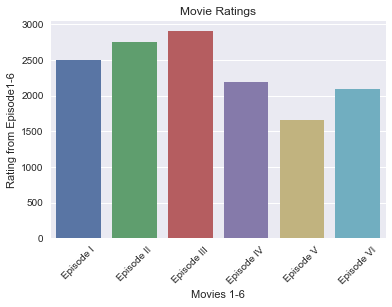

In [224]:
%matplotlib inline
mean=starwar[starwar.columns[9:15]].sum()
movies = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
sns.barplot(movies,mean)
plt.title("Movie Ratings")
plt.xticks(rotation=45)
plt.xlabel("Movies 1-6")
plt.ylabel("Rating from Episode1-6")
plt.show()

**Episode III has the highest ranking**

In [225]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

>**Task 2.2: Relationships between columns**

*Between Movies and Gender*

In [226]:
starwar.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [227]:
males = starwar[starwar['Gender'] == 'MALE']
females = starwar[starwar['Gender'] == 'FEMALE']
movies = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]

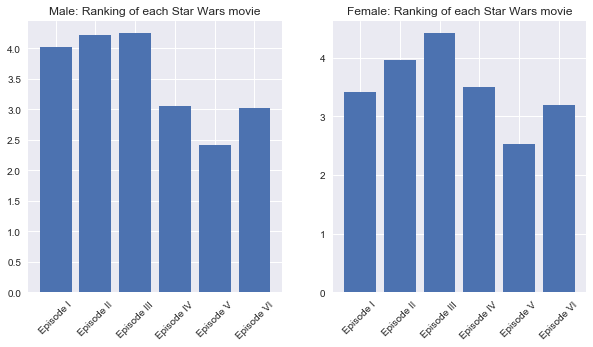

In [228]:
fig = plt.figure(figsize=(10,5))
ax= plt.subplot(1,2,1)
plt.bar(range(6), males.iloc[:, 9:15].mean(), align="center")
plt.xticks(range(6), movies,rotation=45)
plt.title("Male: Ranking of each Star Wars movie")
ax= plt.subplot(1,2,2)
plt.bar(range(6), females.iloc[:, 9:15].mean(), align="center")
plt.xticks(range(6), movies,rotation=45)
plt.title("Female: Ranking of each Star Wars movie")

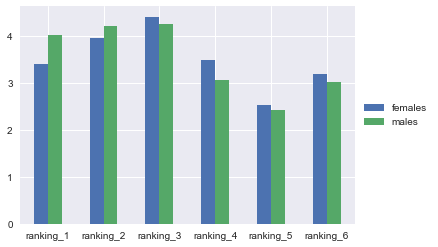

In [229]:
rank_mean_f = females[females.columns[9:15]].mean()
rank_mean_m = males[males.columns[9:15]].mean()
df1 = pd.DataFrame({'females': rank_mean_f,'males': rank_mean_m})
ax = df1.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

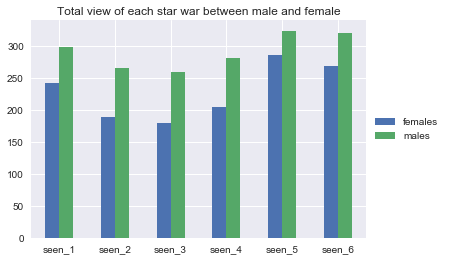

In [230]:
seen_f = females[females.columns[3:9]].sum()
seen_m = males[males.columns[3:9]].sum()
df2 = pd.DataFrame({'females': seen_f,'males': seen_m})
ax2 = df2.plot.bar(rot=0)
plt.title("Total view of each star war between male and female")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

*Between Movies and Education*

In [231]:
def rank_df(srs):
    count = srs.value_counts()
    z = count.index
    edu_rank = {}
    i=0
    for edu in z:
        df1 = starwar[srs == str(edu)]
        edu_rank[edu] = df1[df1.columns[9:15]].mean()
        i+=1
    df_edur = pd.DataFrame(edu_rank)
    return df_edur

def seen_df(srs):
    count = srs.value_counts()
    z = count.index
    edu_seen = {}
    i=0
    for edu in z:
        df1 = starwar[srs == str(edu)]
        edu_seen[edu] = df1[df1.columns[3:9]].sum()
        i+=1
    df_edus = pd.DataFrame(edu_seen)
    return df_edus

In [232]:
df_edur = rank_df(starwar['Education'])
df_edus = seen_df(starwar['Education'])

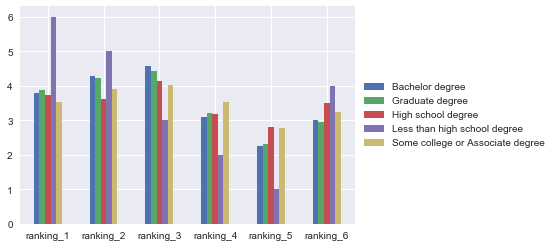

In [233]:
axedur = df_edur.plot.bar(rot=0)
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

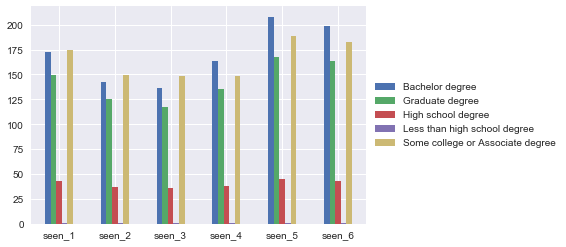

In [234]:
axedus = df_edus.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [235]:
college=starwar[starwar["Education"]=="Some college or Associate degree"]
print(college.shape[0])
Bachelors=starwar[starwar["Education"]=="Bachelor degree"]
print(Bachelors.shape[0])
Grad=starwar[starwar["Education"]=="Graduate degree"]
print(Grad.shape[0])
High_school=starwar[starwar["Education"]=="High school degree"]
print(High_school.shape[0])
InSchool=starwar[starwar["Education"]=="Less than high school degree"]
print(InSchool.shape[0])
college[college.columns[9]].head()
college[college.columns[9:15]].mean()

210
222
185
54
1


ranking_1    3.519048
ranking_2    3.914286
ranking_3    4.028571
ranking_4    3.519048
ranking_5    2.771429
ranking_6    3.247619
dtype: float64

In [236]:
college[college.columns[9:15]].mean()

ranking_1    3.519048
ranking_2    3.914286
ranking_3    4.028571
ranking_4    3.519048
ranking_5    2.771429
ranking_6    3.247619
dtype: float64

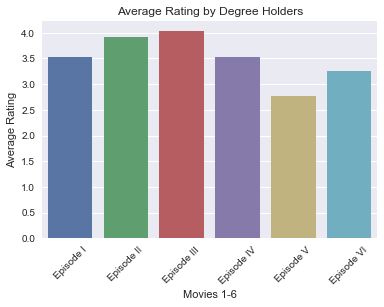

In [237]:
sns.barplot(movies, college[college.columns[9:15]].mean())
plt.xlabel("Movies 1-6")
plt.title("Average Rating by Degree Holders")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

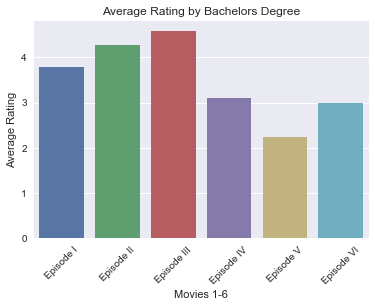

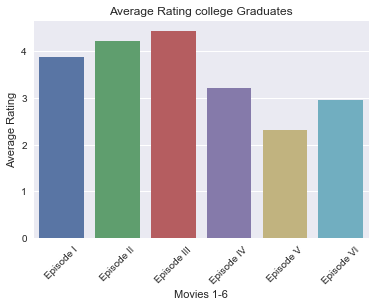

In [238]:
sns.barplot(movies, Bachelors[Bachelors.columns[9:15]].mean())
plt.xlabel("Movies 1-6")
plt.title("Average Rating by Bachelors Degree")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()
sns.barplot(movies, Grad[Grad.columns[9:15]].mean())
plt.xlabel("Movies 1-6")
plt.title("Average Rating college Graduates")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

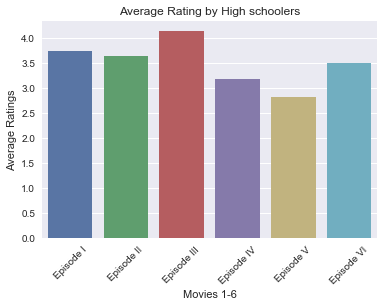

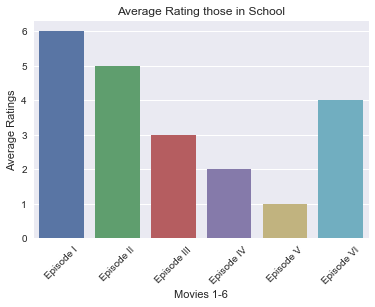

In [239]:
sns.barplot(movies, High_school[High_school.columns[9:15]].mean())
plt.xlabel("Movies 1-6")
plt.title("Average Rating by High schoolers")
plt.ylabel("Average Ratings")
plt.xticks(rotation=45)
plt.show()
sns.barplot(movies, InSchool[InSchool.columns[9:15]].mean())
plt.xlabel("Movies 1-6")
plt.title("Average Rating those in School")
plt.ylabel("Average Ratings")
plt.xticks(rotation=45)
plt.show()

*Between Movies and Location*

In [240]:
df_locr = rank_df(starwar['Location (Census Region)'])
df_locs = seen_df(starwar['Location (Census Region)'])

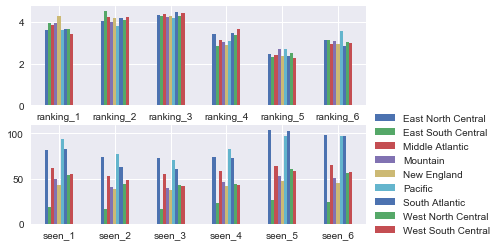

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axlocr = df_locr.plot.bar(rot=0,ax=axes[0])
axlocr.legend().set_visible(False)
axlocs = df_locs.plot.bar(rot=0,ax=axes[1])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

*Between Movies and Shot Character*

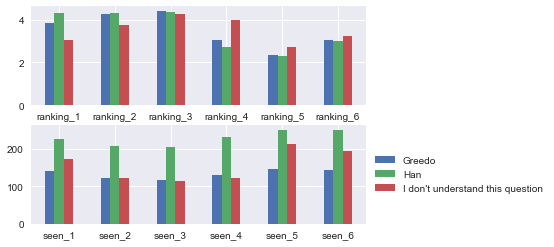

In [242]:
starwar['Which character shot first?'].value_counts()
df_sr = rank_df(starwar['Which character shot first?'])
df_ss = seen_df(starwar['Which character shot first?'])
fig, axes = plt.subplots(nrows=2, ncols=1)
axlocr = df_sr.plot.bar(rot=0,ax=axes[0])
axlocr.legend().set_visible(False)
axlocs = df_ss.plot.bar(rot=0,ax=axes[1])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

>**Task 2.3:Explore a specific relationship**

In [243]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

In [244]:
favor_rank = {
    "Very favorably": 6,
    "Somewhat favorably": 5,
    "Neither favorably nor unfavorably (neutral)": 4,
    "Unfamiliar (N/A)": 3,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 1,
    np.NaN: 0
}
for i in range(15,29):
    starwar[starwar.columns[i]] = starwar[starwar.columns[i]].map(favor_rank)

In [245]:
char_favor_cols = starwar.columns[15:29].tolist()
char_favor_cols_rename = {}
for i in range(len(char_favor_cols)):
    char_favor_cols_rename[char_favor_cols[i]] = 'favor_rank_{}'.format(i+1)

In [246]:
starwar.rename(columns=char_favor_cols_rename, inplace=True)

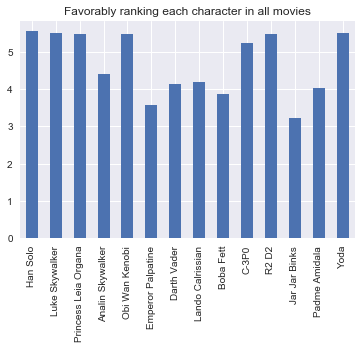

In [247]:
char_favor_means = starwar[starwar.columns[15:29]].mean()
char_favor_means.plot(kind='bar')
chars = (
    "Han Solo",
    "Luke Skywalker",
    "Princess Leia Organa",
    "Analin Skywalker",
    "Obi Wan Kenobi",
    "Emperor Palpatine",
    "Darth Vader",
    "Lando Calrissian",
    "Boba Fett",
    "C-3P0",
    "R2 D2",
    "Jar Jar Binks",
    "Padme Amidala",
    "Yoda"
)
plt.xticks(range(14), chars)
plt.title("Favorably ranking each character in all movies")

*By Age*

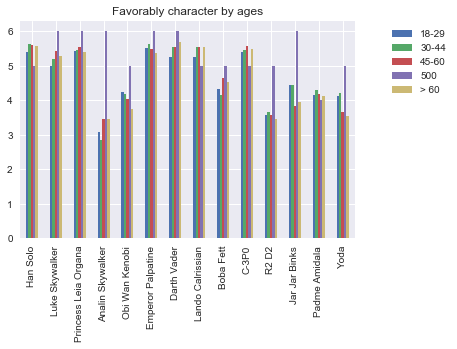

In [248]:
pv = pd.pivot_table(starwar, columns='Age', values=starwar.columns[15:29])
fig = plt.figure(figsize=(20,20))
pv.plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.xticks(range(14), chars)
plt.title("Favorably character by ages")

*By Gender*

In [249]:
gender_char = {'Unnamed: 15': 'Luke Skywalker'
,'Unnamed: 16': 'Yoda'
,'Unnamed: 17': 'R2-D2'
,'Unnamed: 18': 'Darth Vader'
,'Unnamed: 19': 'Princess Leia Organa'
,'Unnamed: 20': 'Jar Jar Binks'
,'Unnamed: 21': 'Anakin Skywalker'
,'Unnamed: 22': 'Padme Amidala'
,'Unnamed: 23': 'Boba Fett'
,'Unnamed: 24': 'C-3P0'
,'Unnamed: 25': 'Obi Wan Kenobi'
,'Unnamed: 26': 'Emperor Palpatine'
,'Unnamed: 27': 'Lando Calrissian'
,'Unnamed: 28': 'Han Solo'}

In [250]:
starwar = starwar.rename(columns = gender_char)

In [251]:
def char_fave(df):
    df = df.rename(columns = {df.columns[15]:'Unnamed: 15'})
    df = df.rename(columns = gender_char)
    for srs in df.columns[15:29]:
        df[srs] = df[srs].map(favor_rank)
    char_rank_mean = df[df.columns[15:29]].mean()
    char_rank_mean = char_rank_mean.sort_values(axis=0, ascending=True, inplace=False)
    return char_rank_mean

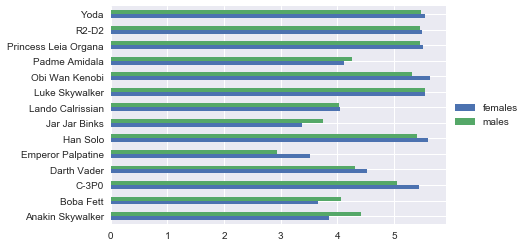

In [252]:
male_char = char_fave(males)

female_char = char_fave(females)

dfchar_gender = pd.DataFrame({'females': female_char,'males': male_char})
dfchar_gender.plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))